# Akaike Information Criterion (AIC)
El [AIC](https://es.wikipedia.org/wiki/Criterio_de_informaci%C3%B3n_de_Akaike) es un criterio creado por Akaike (japones Hirotugo Akaike) publicado en 1974.

Este metodo tiene dos componenes principales:

* El numero de parametros
* El likelihood  (verosimilitud)

La formula es:

$$\textrm{AIC} = 2k - 2 \ln (L). $$
donde $K$ es el numero de parametros y $L$ es el likelihood (verosimilitud).

Por que esta formula.

1. El numero de parametros $K$. Debemos minimizar la expresion AIC y si los parametros son menos entones la minimizacion cobra importancia. Es decir, favorecemos modelos con menos parametros, o mas simples. Este es el principio de "principle of parsimony" (principio de parsimonia): De dos modelos que representen el mismo fenomento, el mas simple es el mas adecuado. Hay otra razon importante para que $K$ se pequeno **overfitting**. Entre mas pequeno sea $K$ menos probable es que hagamos overfitting (sobreajuste).

2. maximizacion del likelihood function. La maximizacion de la verosimilitud se da con la minizacion de su negativo y en particular de $-2 \ln L$.

Hay algunos metodos conocidos para estimar parametros basados en MLE (Maximum Likelihood Estimation).

1. Conditional MLE estimation
2. Exact MLE estimation (unconditional).
Solo estudiamos en esta clase el primero (1).

## Como se cuentan los parametros.
* Si el modelo es AR(p) los parametros son p+2, por que se le suman el drift $c$, y la varianza del ruido $\sigma_Z$. 
* Si el modelo es ARMA(p,q) entonces $K=$p+q+2. 

## Parte cuantitativa del MLE:
Pensemos en modelo AR(1) como una serie de tiempo $X_1, X_2, ]cdots, X_n$
que es tomado de este modelo. Construimos la funcion de verosimilitud, como PDF
$p(X_1, X_2, \cdots , X_n; \theta)$ donde $\theta=(\phi, \sigma^2, c)$. El
modelo es

$$X_t = \phi X_{t-1} + Z_t + c .$$

CAda $Z_t$ esta distribuido normalmente con $\mathcal{N}(0, \sigma^2)$.

Entondes:

\begin{eqnarray}
P(X_1, X_2, \cdots, X_n; \theta) = \mathcal{L}(\theta | X) &=& \frac{1}{(2 \pi \sigma^2)^{n/2}} \exp \left (  -\frac{1}{2 \sigma^2} \sum_{t=1}^n Z_t^2 \right ) \\
 &=& \frac{1}{(2 \pi \sigma^2)^{n/2}} \exp \left (  -\frac{1}{2 \sigma^2} \sum_{t=1}^n (X_t - \phi X_{t-1} - c)^2 \right ) \\
\end{eqnarray}


Debemos tomar el logaritmo y negarlo.

$$J(\theta) = -\log \mathcal{L}(\theta, X) = \frac{n}{2} \log (2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2  $$


Esta es la funcion objetivo, la cual queremos minimizar. Para esto debemos hallar el gradiente e igualarlo a cero. (calulo en varias variables)

Tomemos las derivadas parciales (igualamos a 0)

$$ \frac{\partial J(\theta)}{\partial \sigma^2} = \frac{n}{2} \frac{1}{2 \pi \sigma^2} (2 \pi)- \frac12 \frac{1}{(\sigma^2)^2}\sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2  =0. $$
La incoginta es $2 \sigma^4$.  Multiplicamos toda esta expresion por $\sigma^4$.

$$n \sigma^2 - \sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2   = 0. $$

Despejamos $\sigma^2$,

$$\sigma^2 = \frac{1}{n} \sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2  = \frac{1}{n} \sum_{i=1}^n Z_i^2 $$
Vemos que $\sigma_2$ es la varianza del ruido.


Para hallar $\phi$ tenemos que:

$$ \frac{\partial J(\theta)}{\partial \phi} = \frac{1}{\sigma^2} \sum_{i=1}^n (X_t - \phi X_{t-1} - c ) X_{t-1}=0.$$

Separando

$$ \phi \sum_{i=1}^n X_{t-1}^2  + c \sum_{i=1}^n X_{t-1} =  \sum_{i=1}^n X_t X_{t-1}  \quad (1) $$

Esta ecuacion es lineal en las incognitas $\phi, c$ . Necesitamos otra ecuacion lineal en las mismas dos incogintas.

$$\frac{\partial J(\theta)}{\partial c} = -\frac{1}{\sigma^2} \sum_{i=1}^n  (X_t - \phi X_{t-1} - c) = 0$$

Multiplicamos por $\sigma^2$, Partimos la suma

$$ \phi \sum_{i=1}^n X_{t-1} + nc = \sum_{i=1}^n X_t  \quad (2) $$

Debemos resolver las ecuaciones (1) y (2) para las incognitas $\phi, c$.

Como queda el sistema de 2 x 2 en forma matricial.

\begin{eqnarray}
\begin{pmatrix}
\sum_{i=1}^n X_{t-1}^2 & \sum_{i=1}^n X_{t-1} \\
\sum_{i=1}^n X_{t-1} & n
\end{pmatrix}
\begin{pmatrix}
\phi \\
c
\end{pmatrix}
= \begin{pmatrix}  \sum_{i=1}^n X_t X_{t-1} \\
\sum_{i=1}^n X_t
\end{pmatrix}
\end{eqnarray}

Una vez conozcamos $\phi, c$ calculamos:


$$\sigma^2 = \frac{1}{n} \sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2  = \frac{1}{n} \sum_{i=1}^n Z_i^2 $$

En general debemos en cuenta modelos ARMA(p,q). Es decir

$$X_t = Z_t + \phi_1 X_{t-1} + \cdots \phi_p X_{t-p} + \beta_1 Z_{t-1} + \cdots \beta_q Z_{t-q} + c $$


En este caso consideramos las variables $[Z_1, Z_2, \cdots, Z_n]$ como variables aleatorias independientes con una distribucion multivariada. Calculamos la matriz de covarianza

$$ \Sigma_{ij} =  \text{cov}[Z_i, Z_j] = \mathbb{E}[(Z_i)^T (Z_j)]. $$

con esta covarianza estiamos la funcion de "likelihood"


$$p(x, \mu, \Sigma) = \mathcal{N}(\mu, \Sigma) = \mathcal{L}(\theta | X) = \frac{1}{\sqrt{ (2 \pi)^n  | \det ( \Sigma})|} \mathrm{e}^{-\frac12 Z^T \Sigma^{_1} Z}  \quad (3)  $$

Aca $\theta=(\phi_1, \phi_2, \cdots, \phi_p, \beta_1, \beta_2, \cdots, \beta_q, c, \sigma^2)$, y
$$ J(\theta) = - \ln \mathcal{L}(X,\theta).$$


 tomando derivadas parciales con respecto a cada una de estas ecuaciones encontramos un sistema de p+q+2 ecuaciones con p+q+2 incognitas que es lineal y toca resolverlo. Si la matriz de covarianza es positiva definida el sistema tiene solucion,.




 En resumen: Para hallar el AIC:

 * Evalue $K=p+q+2$.
 * Evalue la funcion de verosimilitud (3)
 * Halle el negativo del logaritmo de la ecuacion (3). $-\ln \mathcal{L}(X, \theta)$. Llame  a esta la funcion de costo $J(\theta)=-\ln \mathcal{L}(X,\theta)$. 
 * Calcule $\nabla J(\theta)$ hagalo igual a cero y componga un sistema de p+q+2 ecuaiones con p+q+2 incognitas.
 * Resuelva el sistema por $\theta$. Llame la solucion $\theta_0$.

 * Evalue el AIC:

 $$ \text{AIC} = 2 K - 2 \ln(L) = 2K + 2 J(\theta_0)$$

 Veamos un ejemplo en ```Python``` en un modelo AR(1)

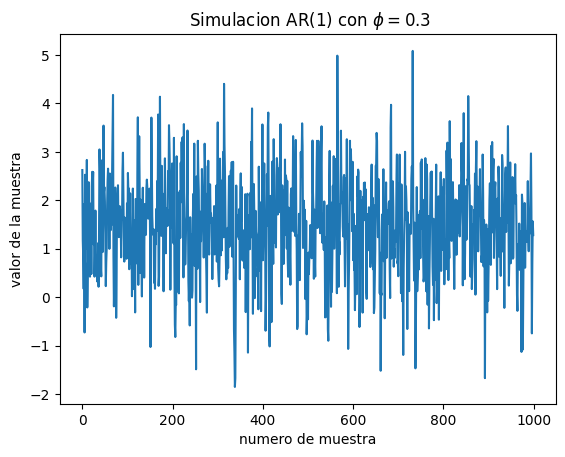

In [2]:
# cargue librerias
import matplotlib.pyplot as plt
import numpy as np

N=1000
np.random.seed(1)

sigma = 1.0
Z = np.random.standard_normal(N)

phi=0.3
c=1 # drift no cero
X=np.zeros(N)
X[0] = Z[0] + c

# recursion
for t in range(1,N):
    X[t] = Z[t] + phi*X[t-1]+c

# grafica
plt.xlabel("numero de muestra")
plt.ylabel("valor de la muestra")
plt.title(f" Simulacion AR(1) con $\phi=${phi}")
plt.plot(X)

## Solucion al MLE esta data por

\begin{eqnarray}
\begin{pmatrix} \phi \\ c \end{pmatrix}
= \begin{pmatrix}
\sum_{i=1}^n X_{t-1}^2 & \sum_{i=1}^n X_{t-1} \\
\sum_{i=1}^n X_{t-1} & n
\end{pmatrix}^{-1} \begin{pmatrix}  \sum_{i=1}^n X_t X_{t-1} \\
\sum_{i=1}^n X_t
\end{pmatrix}
\end{eqnarray}

In [8]:
# la matriz la llamamos S, con
S11 = sum(X**2) - X[N-1]**2
S12 = sum(X) - X[N-1]
S21 = S12
S22 = N

Smat = np.array([[ S11, S12], [S21, S22]])

# vamos al vector
b1 = sum ( X[j]*X[j-1] for j in range(1, N))
b2 = sum(X[j] for j in range(1,N)) # sum(X)-X[0]

b = np.array([b1, b2])

In [9]:
b2

1480.8436981115594

In [10]:
sum(X)- X[0]

1480.8436981115594

In [11]:
# resolvemeos el sistema lineal
theta = np.linalg.solve(Smat, b)
phimle = theta[0]
cmle = theta[1]

In [12]:
theta

array([0.27699927, 1.07027947])

In [20]:
s2 = (1/N)* sum( (X[j] - phi*X[j-1]-c)**2 for j in range(1,N))
print(f"$\phi=${phimle}")
print(f"$c=${cmle}")
print(f"error en $\phi$ es {phi-phimle}")
print(f"erro en $c=${cmle-c}")

$\phi=$0.27699927230042204
$c=$1.070279469542364
error en $\phi$ es 0.02300072769957795
erro en $c=$0.07027946954236408


## Log likelihood:

$$J(\theta) = -\log \mathcal{L}(\theta, X) = \frac{n}{2} \log (2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \sum_{i=1}^n (X_t - \phi X_{t-1} - c)^2  $$

In [22]:
ll = -(N/2)*np.log(2*np.pi*s2) - (1/(2*s2))*sum( (X[i] - phi*X[i-1] - c)**2 \
                                                for i in range(1,N))

ll  # -J(\theta) o log(L)

-1399.1714030960425

Este fue el proceso "a mano" vamos a hacer esto usando ```statsmodels```

In [51]:
import statsmodels.api as sm

mod = sm.tsa.SARIMAX(X, order = (5,0,0)) #p=5, d=0 (diferenciador, lo vemos luego), m=0, por que no p=1? mas adelante


# help(mod)

res = mod.fit()
summary = res.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1000
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1470.031
Date:                Thu, 18 May 2023   AIC                           2952.063
Time:                        13:58:57   BIC                           2981.509
Sample:                             0   HQIC                          2963.255
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4256      0.032     13.449      0.000       0.364       0.488
ar.L2          0.1387      0.034      4.108      0.000       0.073       0.205
ar.L3          0.0576      0.034      1.709      0.087      -0.008       0.124
ar.L4          0.1649      0.034      4.842      0.000       0.098       0.232
ar.L5          0.1200      0.031      3.853      0.000       0.059       0.181
sigma2         1.1060      0.050     22.259      0.000       1.009       1.203
===================================================================================
Ljung-Box (L1) (Q):                   1.27   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.26   Prob(JB):                         0.48
Heteroskedasticity (H):               0.97   Skew:                            -0.09
Prob(H) (two-sided):                  0.81   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
# como capturamos esa informacion
type(summary)

statsmodels.iolib.summary.Summary

In [53]:
# para capturar informacion usamos PANDAS
import pandas as pd
from io import StringIO
results_as_html = summary.as_html()
df = pd.read_html(results_as_html, header=0, index_col=0)[0]
df

,y,No. Observations:,1000
Dep. Variable:,,,
Model:,"SARIMAX(5, 0, 0)",Log Likelihood,-1470.031
Date:,"Thu, 18 May 2023",AIC,2952.063
Time:,13:58:57,BIC,2981.509
Sample:,0,HQIC,2963.255
NaN,- 1000,NaN,NaN
Covariance Type:,opg,NaN,NaN


In [54]:
dfalign = df.to_numpy()
dfalign

array([['SARIMAX(5, 0, 0)', 'Log Likelihood', -1470.031],
       ['Thu, 18 May 2023', 'AIC', 2952.063],
       ['13:58:57', 'BIC', 2981.509],
       ['0', 'HQIC', 2963.255],
       ['- 1000', nan, nan],
       ['opg', nan, nan]], dtype=object)

In [55]:
loglikesn = dfalign[0][2]
loglikesn

-1470.031

In [56]:
# error relativo
relativeerror = (ll - loglikesn)/ll
relativeerror

-0.05064397167292127

### Computo del AIC

AIC = $2K - 2 log(L)$ = 2K + $J(\theta)$.

In [57]:
k=2 # por que? c, phi, donde esta sigma?
AIC = 2*k - 2*ll
AIC

2802.342806192085

In [58]:
# otra forma de AIC from statsmodels

AICsm = sm.tools.eval_measures.aic(ll, N, 2)
print("AIC from statsmodels", AICsm)
absolute_error = (AIC - AICsm)
print("absolute error from formula and statsmodesl is", absolute_error)

AIC from statsmodels 2802.342806192085
absolute error from formula and statsmodesl is 0.0
